#Homerwork 1
##Rafael Barrera Quiroz C.C.1035433047

###Analice el libro contando la aparición de tres nombres de personajes principales: Jim, Tom, Huck a través de los capítulos del libro.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from urllib.request import urlopen

In [2]:
Book = urlopen("https://www.gutenberg.org/files/76/76-0.txt").read().decode('utf-8')

In [3]:
start='CHAPTER I.'
finish='\r\n\r\nCHAPTER THE LAST.'
chaps=Book[Book.find(start):Book.find(finish)+len(finish)]
chaps=chaps.split('\r\n\r\n')

In [4]:
lst_chaps=[]
for i in range(len(chaps)):
  lst_chaps.append(chaps[i][0:chaps[i].find('.')])
print(f'Number book´s chapters is {len(lst_chaps)}')

Number book´s chapters is 43


In [5]:
lst_chaps.append('THE END')

In [6]:
name=['Tom','Jim','Huck']
Num=[]
for j in range(3):
  for i in range(42):
    if i==41:
      start=lst_chaps[i]+'.\r\n\r\n\r\n'
      finish='\r\n\r\n\r\n\r\n\r\n'+lst_chaps[i+1]+'\r\n\r\n\r\n'
      Ch=Book[Book.find(start)+len(start):Book.rfind(finish)]
      num=Ch.count(name[j])+Ch.count(name[j].upper())+Ch.count(name[j].lower())
      Num.append(num)
  
    if i==42:
      start=lst_chaps[i]+'\r\n\r\n\r\n'
      finish='\r\n\r\n'+lst_chaps[i+1]+'.'
      Ch=Book[Book.find(start)+len(start):Book.rfind(finish)]
      num=Ch.count(name[j])+Ch.count(name[j].upper())+Ch.count(name[j].lower())
      Num.append(num)  

    start=lst_chaps[i]+'.\r\n\r\n\r\n'
    finish='\r\n\r\n\r\n\r\n\r\n'+lst_chaps[i+1]+'.\r\n\r\n\r\n'
    Ch=Book[Book.find(start)+len(start):Book.rfind(finish)]
    num=Ch.count(name[j])+Ch.count(name[j].upper())+Ch.count(name[j].lower())
    Num.append(num)

In [7]:
Num=np.array(Num)
Num=Num.reshape(3,43)

In [8]:
cha='Chapter_'
L=np.arange(1,44).astype(str)
col=[]
for i in range(43):
  col.append(cha+L[i])

In [9]:
data=pd.DataFrame(Num,columns=col)
data.insert(0,'Name',name)

In [10]:
data

,Name,Chapter_1,Chapter_2,Chapter_3,Chapter_4,Chapter_5,Chapter_6,Chapter_7,Chapter_8,Chapter_9,...,Chapter_34,Chapter_35,Chapter_36,Chapter_37,Chapter_38,Chapter_39,Chapter_40,Chapter_41,Chapter_42,Chapter_43
0,Tom,6,24,5,1,0,2,5,2,1,...,15,18,19,11,32,12,11,9,32,38
1,Jim,0,16,0,8,0,0,0,22,11,...,17,18,24,4,27,10,13,0,12,18
2,Huck,3,2,3,1,0,2,0,6,1,...,6,9,2,0,3,1,3,1,2,7


In [11]:
data.to_csv('data_counts.csv',index=False) ##Export to csv file

In [12]:
data_upload=pd.read_csv('data_counts.csv')  ##upload csv file

In [13]:
data_upload

,Name,Chapter_1,Chapter_2,Chapter_3,Chapter_4,Chapter_5,Chapter_6,Chapter_7,Chapter_8,Chapter_9,...,Chapter_34,Chapter_35,Chapter_36,Chapter_37,Chapter_38,Chapter_39,Chapter_40,Chapter_41,Chapter_42,Chapter_43
0,Tom,6,24,5,1,0,2,5,2,1,...,15,18,19,11,32,12,11,9,32,38
1,Jim,0,16,0,8,0,0,0,22,11,...,17,18,24,4,27,10,13,0,12,18
2,Huck,3,2,3,1,0,2,0,6,1,...,6,9,2,0,3,1,3,1,2,7


In [14]:
data_np=data_upload.to_numpy()
data_np=np.delete(data_np,0,1)

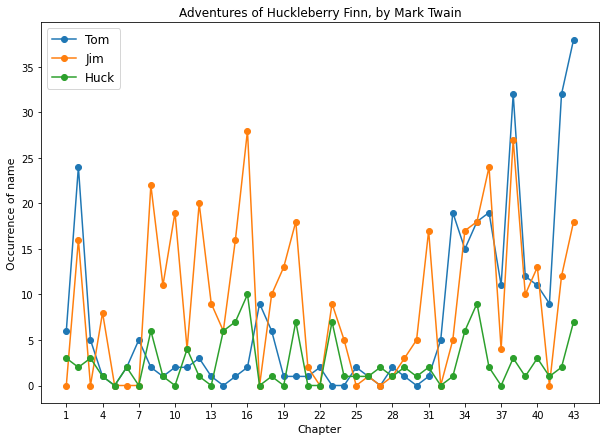

In [15]:
plt.figure(figsize=(10,7))
for i in range(3):
  plt.plot(np.arange(1,44),data_np[i],'-o',label=name[i])
  plt.xticks(np.arange(1,44,3))
plt.xlabel('Chapter', fontsize=11)
plt.ylabel('Occurrence of name', fontsize=11)
plt.title('Adventures of Huckleberry Finn, by Mark Twain', fontsize=12)
plt.legend(fontsize=12)
plt.show()

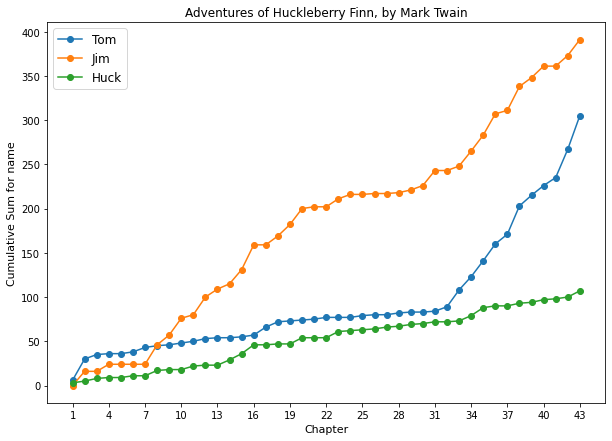

In [16]:
plt.figure(figsize=(10,7))
for i in range(3):
  plt.plot(np.arange(1,44),data_np[i].cumsum(),'-o',label=name[i])
  plt.xticks(np.arange(1,44,3))
plt.xlabel('Chapter', fontsize=11)
plt.ylabel('Cumulative Sum for name', fontsize=11)
plt.title('Adventures of Huckleberry Finn, by Mark Twain', fontsize=12)
plt.legend(fontsize=12)
plt.show()

###Puede observarse, como a partir del cápitulo 8, el personaje Jim cobra mayor relevancia que cualquiera de los otros personajes.